In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

Cel:
Zaimplementowanie sieci neuronowej w PyTorch, która będzie modelować nieliniową funkcję jednej zmiennej. Celem zadania jest przewidzenie wartości wyjściowej funkcji dla danego wejścia (regresja).

Opis:
Zaimplementujesz sieć neuronową, która nauczy się odwzorowania nieliniowej funkcji  𝑦=sin(𝑥)+0,1𝑥2
  z dodanym szumem. Model będzie uczony na wygenerowanych danych, a następnie ocenisz jego wydajność.

Text(0, 0.5, 'y')

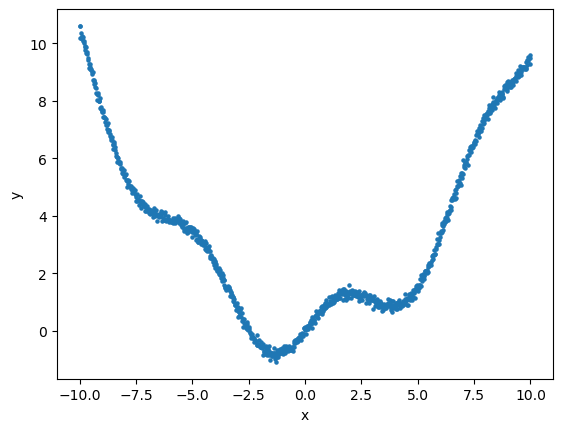

In [3]:
# 0.Ggenerowanie danych
x = np.linspace(-10, 10, 1000)

y = np.sin(x) + 0.1 * x**2 + np.random.normal(scale=0.1, size=x.shape)

plt.scatter(x, y, s=5, label="Dane z szumem")
plt.xlabel('x')
plt.ylabel('y')

In [5]:
# 1. Przygotowanie danych
x_data = torch.tensor(x, dtype=torch.float32).view(-1,1)
y_data = torch.tensor(y, dtype=torch.float32).view(-1,1)

In [7]:
# 2. Definicja sieci
#sieć 3-warstwowa
class nonLinReg_3l(nn.Module):
    def __init__(self,n_input=1,n_hidden=18,n_output=1):
        super(nonLinReg_3l,self).__init__()
        activation=nn.Sigmoid
        
        self.input_layer=nn.Sequential(*[nn.Linear(n_input,n_hidden),activation()])
        self.output_layer=nn.Linear(n_hidden,n_output)
    def forward(self,x):
        x=self.input_layer(x)
        x=self.output_layer(x)
        return x

In [9]:
#sieć 4-warstwowa
class nonLinReg_4l(nn.Module):
    def __init__(self,n_input=1,n_hidden1=12, n_hidden2=12, n_output=1):
        super(nonLinReg_4l,self).__init__()
        activation=nn.Sigmoid
        
        self.input_layer=nn.Sequential(*[nn.Linear(n_input,n_hidden1),activation()])
        self.hidden_layer=nn.Sequential(*[nn.Linear(n_hidden1,n_hidden2),activation()])
        self.output_layer=nn.Linear(n_hidden2,n_output)
    def forward(self,x):
        x=self.input_layer(x)
        x=self.hidden_layer(x)
        x=self.output_layer(x)
        return x

In [11]:
model = nonLinReg_3l()
#model = nonLinReg_4l()

In [16]:
# 3. Definicja funkcji stray i optymalizatora
loss_fcn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=0.01)

In [22]:
# 4. Trening sieci
loss_list = []
n_iter = 8000
for epoch in range(n_iter):
    optimizer.zero_grad()
    y_pred = model(x_data)
    loss=loss_fcn(y_pred,y_data)
    loss_list.append(loss.detach().numpy())
    loss.backward()
       
    optimizer.step()

MSE = 0.0309


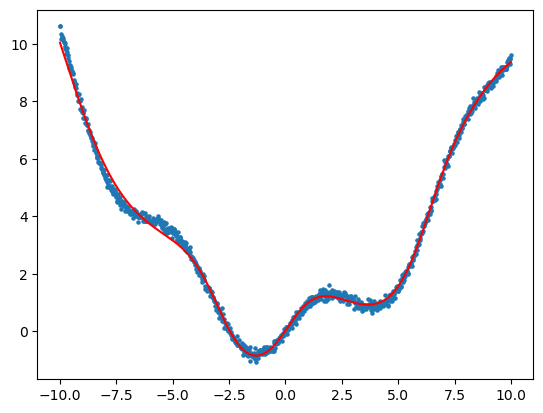

In [28]:
y_mod = y_pred.detach().numpy()
plt.plot(x, y_mod, 'red')
plt.scatter(x, y, s=5)
print(f'MSE = {loss.item():.4f}')


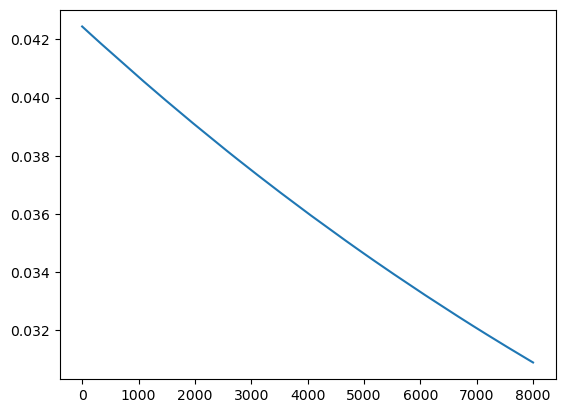

In [30]:
plt.plot(loss_list)